[CV](https://www.cdc.gov/brfss/annual_data/2015/pdf/2015_Calculated_Variables_Version4_08_10_17-508c.pdf)
(all_feat)[https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf]

In [20]:
from functions.helpers import *
from functions.implementations import *
from functions.my_functions import *
import numpy as np
import pandas as pd

In [2]:
# Import df
df = pd.read_csv("data/dataset/x_train.csv")

# Feature Selection

In [3]:
# Select columns that we are going to use for the analysis

data_dict = {
    # "name of the var": ["synbol for nan", type of varibale]
    # if "nan" --> means to create a new class for missing values
    # if "no_missing" --> no need for NaN impuation
    # if "countousn" --> put mean
    # if "N" --> trnasg all NaN in that N
    "ACTIN11_": ["nan", "discrete"],
    "ACTIN21_": ["nan", "discrete"],
    "DROCDY3_": [900, "continous"],
    "FC60_": [99900, "continous"],
    "FRUTDA1_": ["nan", "continous"],
    "_FRTRESP": ["no_missing", "discrete"],
    "_FRUITEX": ["no_missing", "discrete"],
    "_FRUTSUM": ["nan", "continous"],
    "_HCVU651": [9, "discrete"],
    "_HISPANC": [9, "discrete"],
    "_INCOMG": [9, "discrete"],
    "_LMTACT1": [9, "discrete"],
    "_LMTSCL1": [9, "discrete"],
    "_LMTWRK1": [9, "discrete"],
    "_LTASTH1": [9, "discrete"],
    "_MINAC11": ["nan", "continous"],
    "_MINAC21": ["nan", "continous"],
    "_MISFRTN": ["no_missing", "discrete"],
    "_MISVEGN": ["no_missing", "discrete"],
    "_MRACE1": ["no_missing", "discrete"],
    "_PA30021": [9, "discrete"],
    "_PA150R2": [9, "discrete"],
    "_PA300R2": [9, "discrete"],
    "_PACAT1": [9, "discrete"],
    "_PAINDX1": [9, "discrete"],
    "_PAREC1": [9, "discrete"],
    "_PASTAE1": [9, "discrete"],
    "_PASTRNG": [9, "discrete"],
    "_PNEUMO2": [9, "discrete"],
    "_PRACE1": [99, "discrete"],
    "_RACE": [9, "discrete"],
    "_RACEG21": [9, "discrete"],
    "_RACEGR3": [9, "discrete"],
    "_RACE_G1": ["nan", "discrete"],
    "_RFBING5": [9, "discrete"],
    "_RFBMI5": [9, "discrete"],
    "_RFCHOL": [9, "discrete"],
    "_RFDRHV5": [9, "discrete"],
    "_RFHLTH": [9, "discrete"],
    "_RFHYPE5": [9, "discrete"],
    "_RFSEAT2": [9, "discrete"],
    "_RFSEAT3": [9, "discrete"],
    "_RFSMOK3": [9, "discrete"],
    "_SMOKER3": [9, "discrete"],
    "_TOTINDA": [9, "discrete"],
    "_VEG23": [0, "discrete"],
    "_VEGESUM": ["nan", "continous"],
    "_VEGETEX": [1, "discrete"],
    "_VEGLT1": [9, "discrete"],
    "GRENDAY_": ["nan", "continous"],
    "MAXVO2_": [99900, "continous"],
    "METVL11_": ["nan", "continous"],
    "METVL21_": ["nan", "continous"],
    "ORNGDAY_": ["nan", "continous"],
    "PA1MIN_": ["nan", "continous"],
    "PA1VIGM_": ["nan", "continous"],
    "PADUR1_": ["nan", "continous"],
    "PADUR2_": ["nan", "continous"],
    "PAFREQ1_": [99000, "continous"],
    "PAFREQ2_": [99000, "continous"],
    "PAMIN11_": ["nan", "continous"],
    "PAMIN21_": ["nan", "continous"],
    "PAMISS1_": [9, "discrete"],
    "PAVIG11_": ["nan", "continous"],
    "PAVIG21_": ["nan", "continous"],
    "VEGEDA1_": ["nan", "continous"],
    "_AGE80": ["nan", "continous"],
    "_AIDTST3": [9, "discrete"],
    "_ASTHMS1": [9, "discrete"],
    "_BMI5": ["nan", "continous"],
    "_CASTHM1": [9, "discrete"],
    "_CHLDCNT": [9, "discrete"],
    "_CHOLCHK": [9, "discrete"],
    "_DRDXAR1": ["nan", "discrete"],
    "_DRNKWEK": [99900, "continous"],
    "_EDUCAG": [9, "discrete"],
    "_FLSHOT6": [9, "discrete"],
    "_FRT16": [0, "discrete"],
    "_FRTLT1": [9, "discrete"]
}

"""
VC calculated but not used because
    - not present in out dataset: '_MICHD', '_VEGRESPFTJUDA1_', 'PAINACT2'
    - make no sense: 
        "_LLCPWT" "_DUALCOR" "_DUALUSE" --> HIDDEN or cell phone
        ("_AGE65YR" "_AGEG5YR" _AGE_G--> alredy rpesent in AGE80) 
        "_BMI5CAT" --> altry in _BMI
"""

# TODO: Maybe add other cols that could be useful
other_useful_cols = np.array(["Id"])

# Columns to select
useful_cols = np.concatenate([other_useful_cols, list(data_dict.keys())])

# Select usduful cols
df_filtered = df[useful_cols].copy()
print(len(df_filtered.columns))

df_filtered

80


,Id,ACTIN11_,ACTIN21_,DROCDY3_,FC60_,FRUTDA1_,_FRTRESP,_FRUITEX,_FRUTSUM,_HCVU651,...,_BMI5,_CASTHM1,_CHLDCNT,_CHOLCHK,_DRDXAR1,_DRNKWEK,_EDUCAG,_FLSHOT6,_FRT16,_FRTLT1
0,0,1.0,1.0,0,4.61,0.71,1,0,0.71,1,...,20.78,1,1,1,2.0,0,3,NaN,1,2
1,1,NaN,NaN,100,4.91,NaN,0,1,NaN,1,...,28.70,1,1,1,2.0,99900,2,NaN,1,9
2,2,1.0,0.0,13,4.11,2.00,1,0,2.03,9,...,NaN,1,1,1,1.0,93,4,1.0,1,1
3,3,2.0,2.0,0,4.11,0.00,1,0,0.00,9,...,27.96,1,1,2,1.0,0,2,2.0,1,2
4,4,NaN,NaN,900,999.00,0.50,1,0,1.50,9,...,24.39,1,1,1,2.0,99900,9,9.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,328130,1.0,1.0,71,4.91,1.00,1,0,1.00,1,...,24.69,1,1,1,2.0,1000,4,NaN,1,1
328131,328131,2.0,2.0,0,5.10,1.00,1,0,1.00,1,...,24.39,1,1,9,2.0,0,3,NaN,1,1
328132,328132,1.0,0.0,0,3.92,1.00,1,0,1.00,9,...,58.53,1,1,1,2.0,0,3,2.0,1,1
328133,328133,2.0,0.0,0,6.23,0.07,1,0,0.07,1,...,35.87,2,1,1,2.0,0,2,NaN,1,2


In [4]:
# REMOVE COLS WITH TOO MANY NAN

thr_nan = 0.75

# Calculate the threshold for NaN values
threshold = thr_nan * len(df_filtered)

# Identify columns to drop
cols_to_drop = df_filtered.columns[df_filtered.isna().sum() > threshold]

# Print the names of the columns that will be dropped
print("Columns to be dropped:", cols_to_drop.tolist())

# Drop the columns
df_filtered.drop(columns=cols_to_drop, inplace=True)
df_filtered

Columns to be dropped: []


,Id,ACTIN11_,ACTIN21_,DROCDY3_,FC60_,FRUTDA1_,_FRTRESP,_FRUITEX,_FRUTSUM,_HCVU651,...,_BMI5,_CASTHM1,_CHLDCNT,_CHOLCHK,_DRDXAR1,_DRNKWEK,_EDUCAG,_FLSHOT6,_FRT16,_FRTLT1
0,0,1.0,1.0,0,4.61,0.71,1,0,0.71,1,...,20.78,1,1,1,2.0,0,3,NaN,1,2
1,1,NaN,NaN,100,4.91,NaN,0,1,NaN,1,...,28.70,1,1,1,2.0,99900,2,NaN,1,9
2,2,1.0,0.0,13,4.11,2.00,1,0,2.03,9,...,NaN,1,1,1,1.0,93,4,1.0,1,1
3,3,2.0,2.0,0,4.11,0.00,1,0,0.00,9,...,27.96,1,1,2,1.0,0,2,2.0,1,2
4,4,NaN,NaN,900,999.00,0.50,1,0,1.50,9,...,24.39,1,1,1,2.0,99900,9,9.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,328130,1.0,1.0,71,4.91,1.00,1,0,1.00,1,...,24.69,1,1,1,2.0,1000,4,NaN,1,1
328131,328131,2.0,2.0,0,5.10,1.00,1,0,1.00,1,...,24.39,1,1,9,2.0,0,3,NaN,1,1
328132,328132,1.0,0.0,0,3.92,1.00,1,0,1.00,9,...,58.53,1,1,1,2.0,0,3,2.0,1,1
328133,328133,2.0,0.0,0,6.23,0.07,1,0,0.07,1,...,35.87,2,1,1,2.0,0,2,NaN,1,2


In [23]:
# REMOVE PATIENTS WITH TOO MANY NaN

# NO !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Impute missing Values

In [5]:
# IMPUTE MISSING VALUES

for col_name in df_filtered.columns:
    try:
        col = data_dict[col_name]
    except KeyError:
        print(f"Column {col_name} not in the dict.")
        continue  # Skip to the next iteration if the column is not found

    type_feature = col[1]
    nan_symbol = col[0]

    #print(f"{col_name} {type_feature} {nan_symbol}")

    if type_feature == "continous":
        # Replace NaN values with the mean of the feature
        mean_value = df_filtered[col_name].mean()
        df_filtered[col_name] = df_filtered[col_name].fillna(mean_value)  # Replace NaN with Mean
        df_filtered[col_name] = df_filtered[col_name].replace(nan_symbol, mean_value)  # Replace NaN symbols with Mean
        
    elif type_feature == "discrete":
        # Handle NaN values for discrete features
        if nan_symbol == "nan":  # No predefined category for missing
            df_filtered[col_name] = df_filtered[col_name].fillna(-1)  # Replace with -1 for missing
        else:
            df_filtered[col_name] = df_filtered[col_name].fillna(nan_symbol)  # Replace NaN with predefined missing value

display(df_filtered)

#Check for Nan Values
print(df_filtered.columns[df_filtered.isna().any()].tolist())

Column Id not in the dict.


,Id,ACTIN11_,ACTIN21_,DROCDY3_,FC60_,FRUTDA1_,_FRTRESP,_FRUITEX,_FRUTSUM,_HCVU651,...,_BMI5,_CASTHM1,_CHLDCNT,_CHOLCHK,_DRDXAR1,_DRNKWEK,_EDUCAG,_FLSHOT6,_FRT16,_FRTLT1
0,0,1.0,1.0,0.000000,4.61,0.710000,1,0,0.710000,1,...,20.780000,1,1,1,2.0,0.00000,3,9.0,1,2
1,1,-1.0,-1.0,100.000000,4.91,1.004961,0,1,1.361799,1,...,28.700000,1,1,1,2.0,6021.99214,2,9.0,1,9
2,2,1.0,0.0,13.000000,4.11,2.000000,1,0,2.030000,9,...,28.033007,1,1,1,1.0,93.00000,4,1.0,1,1
3,3,2.0,2.0,0.000000,4.11,0.000000,1,0,0.000000,9,...,27.960000,1,1,2,1.0,0.00000,2,2.0,1,2
4,4,-1.0,-1.0,59.131565,999.00,0.500000,1,0,1.500000,9,...,24.390000,1,1,1,2.0,6021.99214,9,9.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,328130,1.0,1.0,71.000000,4.91,1.000000,1,0,1.000000,1,...,24.690000,1,1,1,2.0,1000.00000,4,9.0,1,1
328131,328131,2.0,2.0,0.000000,5.10,1.000000,1,0,1.000000,1,...,24.390000,1,1,9,2.0,0.00000,3,9.0,1,1
328132,328132,1.0,0.0,0.000000,3.92,1.000000,1,0,1.000000,9,...,58.530000,1,1,1,2.0,0.00000,3,2.0,1,1
328133,328133,2.0,0.0,0.000000,6.23,0.070000,1,0,0.070000,1,...,35.870000,2,1,1,2.0,0.00000,2,9.0,1,2


[]


# Correlation
Before encoding check if some cols are correlated.
Maybe remove the ones highly correlated.

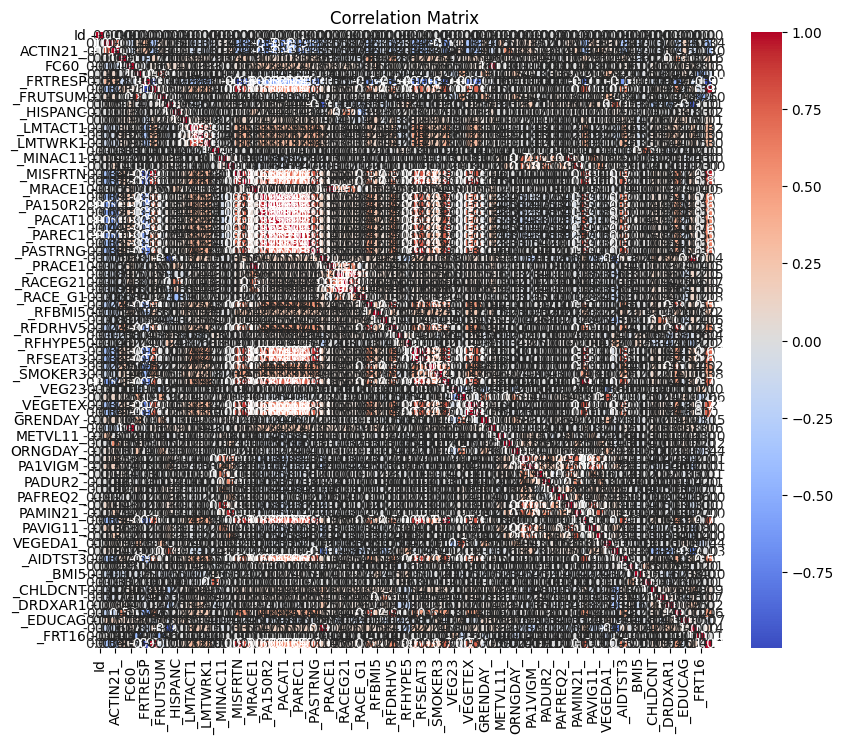

In [132]:
# CORRELATION

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_filtered.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Show the plot
plt.title('Correlation Matrix')
plt.show()

In [134]:
# Calculate the correlation matrix
correlation_matrix = df_filtered.corr()

# Create a mask for correlations greater than 0.6
mask = (correlation_matrix.abs() > 0.9) & (correlation_matrix != 1)

# Get the pairs of columns with high correlation
high_corr_pairs = []

for row in correlation_matrix.index:
    for col in correlation_matrix.columns:
        if mask.loc[row, col]:
            high_corr_pairs.append((row, col, correlation_matrix.loc[row, col]))

# Print the pairs
for pair in high_corr_pairs:
    print(f"Columns: {pair[0]} and {pair[1]} - Correlation: {pair[2]:.2f}")

Columns: FC60_ and MAXVO2_ - Correlation: 1.00
Columns: _FRTRESP and _FRUITEX - Correlation: -1.00
Columns: _FRTRESP and _MISFRTN - Correlation: -0.96
Columns: _FRTRESP and _FRTLT1 - Correlation: -0.98
Columns: _FRUITEX and _FRTRESP - Correlation: -1.00
Columns: _FRUITEX and _MISFRTN - Correlation: 0.96
Columns: _FRUITEX and _FRTLT1 - Correlation: 0.98
Columns: _MINAC11 and PAMIN11_ - Correlation: 0.92
Columns: _MINAC21 and PAMIN21_ - Correlation: 0.93
Columns: _MISFRTN and _FRTRESP - Correlation: -0.96
Columns: _MISFRTN and _FRUITEX - Correlation: 0.96
Columns: _MISFRTN and _MISVEGN - Correlation: 0.90
Columns: _MISFRTN and _FRTLT1 - Correlation: 0.95
Columns: _MISVEGN and _MISFRTN - Correlation: 0.90
Columns: _MISVEGN and _VEGETEX - Correlation: 0.91
Columns: _MISVEGN and _VEGLT1 - Correlation: 0.90
Columns: _MRACE1 and _PRACE1 - Correlation: 1.00
Columns: _PA30021 and _PA150R2 - Correlation: 0.94
Columns: _PA30021 and _PA300R2 - Correlation: 0.98
Columns: _PA30021 and _PACAT1 - Corr

# Encode Discrete Variables
Chose one hot encode

In [6]:
# ENCODING OF DISCRETE VARIABLES

# Extracting keys where the value indicates "discrete"
discrete_keys = [key for key, value in data_dict.items() if value[1] == "discrete"]
print(discrete_keys)
#df_filtered = 
df_filtered = pd.get_dummies(df_filtered, columns=discrete_keys, drop_first=True)
    #ATTENTION DROP FISRT
print(len(df_filtered.columns))

['ACTIN11_', 'ACTIN21_', '_FRTRESP', '_FRUITEX', '_HCVU651', '_HISPANC', '_INCOMG', '_LMTACT1', '_LMTSCL1', '_LMTWRK1', '_LTASTH1', '_MISFRTN', '_MISVEGN', '_MRACE1', '_PA30021', '_PA150R2', '_PA300R2', '_PACAT1', '_PAINDX1', '_PAREC1', '_PASTAE1', '_PASTRNG', '_PNEUMO2', '_PRACE1', '_RACE', '_RACEG21', '_RACEGR3', '_RACE_G1', '_RFBING5', '_RFBMI5', '_RFCHOL', '_RFDRHV5', '_RFHLTH', '_RFHYPE5', '_RFSEAT2', '_RFSEAT3', '_RFSMOK3', '_SMOKER3', '_TOTINDA', '_VEG23', '_VEGETEX', '_VEGLT1', 'PAMISS1_', '_AIDTST3', '_ASTHMS1', '_CASTHM1', '_CHLDCNT', '_CHOLCHK', '_DRDXAR1', '_EDUCAG', '_FLSHOT6', '_FRT16', '_FRTLT1']
182


# Normalize Countinous Variables

ATTENTION:
- test and train must be normlized separated (aboid info leckage)
- normalization happens along feautures, i.e. each column

In [7]:
# NORMALIZATION OF CONTINOUS VARIABLES

continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]

# Normalization Techniques
# 1. Min-Max Scaling
for key in continuous_keys:
    column = df_filtered[key]
    mean_value = np.nanmean(column)  # Calculate mean ignoring NaNs
    column[np.isnan(column)] = mean_value  # Replace NaNs with mean

    # Min-Max Normalization
    min_value = np.min(column)
    max_value = np.max(column)
    column = (column - min_value) / (max_value - min_value)
    
    # Update the column in df_filtered
    df_filtered[key] = column

# 2. Z-score
if False:
    for key in continuous_keys:
        column = df_filtered[key]
        mean_value = np.nanmean(column)
        std_value = np.nanstd(column)  # Standard deviation ignoring NaNs
        column[np.isnan(column)] = mean_value  # Fill NaNs with mean
        column = (column - mean_value) / std_value
        df_filtered[key] = column

# 3. Robust Scalar
if False:
    for key in continuous_keys:
        column = df_filtered[key]
        median_value = np.nanmedian(column)
        q1 = np.nanpercentile(column, 25)  # 25th percentile
        q3 = np.nanpercentile(column, 75)  # 75th percentile
        iqr = q3 - q1  # Interquartile range
        column[np.isnan(column)] = median_value  # Fill NaNs with median
        column = (column - median_value) / iqr
        df_filtered[key] = column

df_filtered

/tmp/ipykernel_258935/2156763228.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[np.isnan(column)] = mean_value  # Replace NaNs with mean
/tmp/ipykernel_258935/2156763228.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[np.isnan(column)] = mean_value  # Replace NaNs with mean
/tmp/ipykernel_258935/2156763228.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[np.isnan(column)] = mean_value  # Replace NaNs

,Id,DROCDY3_,FC60_,FRUTDA1_,_FRUTSUM,_MINAC11,_MINAC21,_VEGESUM,GRENDAY_,MAXVO2_,...,_DRDXAR1_2.0,_EDUCAG_2,_EDUCAG_3,_EDUCAG_4,_EDUCAG_9,_FLSHOT6_2.0,_FLSHOT6_9.0,_FRT16_1,_FRTLT1_2,_FRTLT1_9
0,0,0.000000,0.003667,0.007172,0.004733,0.001122,0.002946,0.006072,0.001010,0.021501,...,True,False,True,False,False,False,True,True,True,False
1,1,1.000000,0.003968,0.010151,0.009079,0.004294,0.002731,0.009782,0.005737,0.023252,...,True,True,False,False,False,False,True,True,False,True
2,2,0.130000,0.003166,0.020202,0.013533,0.001684,0.000000,0.014351,0.010101,0.018521,...,False,False,False,True,False,False,False,True,False,False
3,3,0.000000,0.003166,0.000000,0.000000,0.011223,0.003788,0.013950,0.010101,0.018521,...,False,True,False,False,False,True,False,True,True,False
4,4,0.591316,1.000000,0.005051,0.010000,0.005238,0.002731,0.008681,0.001313,1.000000,...,True,False,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,328130,0.710000,0.003968,0.010101,0.006667,0.001403,0.002525,0.009484,0.003333,0.023252,...,True,False,False,True,False,False,True,True,False,False
328131,328131,0.000000,0.004158,0.010101,0.006667,0.008418,0.000442,0.011742,0.010101,0.024360,...,True,False,True,False,False,False,True,True,False,False
328132,328132,0.000000,0.002976,0.010101,0.006667,0.002245,0.000000,0.003914,0.000707,0.017404,...,True,False,True,False,False,True,False,True,False,False
328133,328133,0.000000,0.005290,0.000707,0.000467,0.000262,0.000000,0.001806,0.001717,0.031003,...,True,True,False,False,False,False,True,True,True,False


# Feature engeneering
    - PCA
    - combinaing features ex. polynomial

In [8]:
x_train,x_test,y_train,train_ids,test_ids = load_csv_data("data/dataset", sub_sample=True)

In [30]:
d = df_filtered

d = d.drop("Id", axis=1)

use = 1

if use == 0:
    # Use all varibales
    display(d)
    x_train = d.to_numpy()
if use == 1:
    # Only use continuos variables
    continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
    d = d[continuous_keys]
    display(d)
    x_train = d.to_numpy()
if use == 2:
    # Only use BMI and AGE80
    d = d[["_AGE80", "_BMI5"]]
    display(d)
    x_train = d.to_numpy()
if use == 3:
    # Only use continuos variables
    continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
    d = d[continuous_keys]
    x_train = d.to_numpy()
    x_train = pca(x_train, variance_threshold=0.9)
if use == 4:
    # Incre the number of continous feaures using polinormilas
    continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
    d = d[continuous_keys]
    x_train = d.to_numpy()
    x_train = build_poly(x_train, degree=3)



display(x_train)
print(x_train.shape)

,DROCDY3_,FC60_,FRUTDA1_,_FRUTSUM,_MINAC11,_MINAC21,_VEGESUM,GRENDAY_,MAXVO2_,METVL11_,...,PAFREQ1_,PAFREQ2_,PAMIN11_,PAMIN21_,PAVIG11_,PAVIG21_,VEGEDA1_,_AGE80,_BMI5,_DRNKWEK
0,0.000000,0.003667,0.007172,0.004733,0.001122,0.002946,0.006072,0.001010,0.021501,0.273438,...,0.017891,0.044894,0.001122,0.002946,0.000000,0.000000,0.007172,0.629032,0.102301,0.000000
1,1.000000,0.003968,0.010151,0.009079,0.004294,0.002731,0.009782,0.005737,0.023252,0.325824,...,0.038420,0.029312,0.005857,0.003817,0.005761,0.002656,0.008111,0.629032,0.194792,0.113195
2,0.130000,0.003166,0.020202,0.013533,0.001684,0.000000,0.014351,0.010101,0.018521,0.273438,...,0.028015,0.029312,0.001684,0.000000,0.000000,0.000000,0.010101,0.758065,0.187002,0.001748
3,0.000000,0.003166,0.000000,0.000000,0.011223,0.003788,0.013950,0.010101,0.018521,0.351562,...,0.048265,0.007766,0.022447,0.007576,0.042105,0.009375,0.010101,0.758065,0.186150,0.000000
4,0.591316,1.000000,0.005051,0.010000,0.005238,0.002731,0.008681,0.001313,1.000000,0.273438,...,0.044894,0.029312,0.005857,0.003817,0.005761,0.002656,0.008384,0.693548,0.144459,0.113195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,0.710000,0.003968,0.010101,0.006667,0.001403,0.002525,0.009484,0.003333,0.023252,0.273438,...,0.028015,0.007766,0.001403,0.002525,0.000000,0.000000,0.010101,0.629032,0.147962,0.018797
328131,0.000000,0.004158,0.010101,0.006667,0.008418,0.000442,0.011742,0.010101,0.024360,0.531250,...,0.048265,0.002369,0.016835,0.000884,0.031579,0.001094,0.002020,0.596774,0.144459,0.000000
328132,0.000000,0.002976,0.010101,0.006667,0.002245,0.000000,0.003914,0.000707,0.017404,0.273438,...,0.038140,0.029312,0.002245,0.000000,0.000000,0.000000,0.005758,0.806452,0.543151,0.000000
328133,0.000000,0.005290,0.000707,0.000467,0.000262,0.000000,0.001806,0.001717,0.031003,0.570312,...,0.002369,0.029312,0.000524,0.000000,0.000982,0.000000,0.001313,0.403226,0.278524,0.000000


array([[0.00000000e+00, 3.66715094e-03, 7.17171717e-03, ...,
        6.29032258e-01, 1.02300596e-01, 0.00000000e+00],
       [1.00000000e+00, 3.96773709e-03, 1.01511245e-02, ...,
        6.29032258e-01, 1.94791545e-01, 1.13195341e-01],
       [1.30000000e-01, 3.16617404e-03, 2.02020202e-02, ...,
        7.58064516e-01, 1.87002298e-01, 1.74812030e-03],
       ...,
       [0.00000000e+00, 2.97580282e-03, 1.01010101e-02, ...,
        8.06451613e-01, 5.43150765e-01, 0.00000000e+00],
       [0.00000000e+00, 5.29031612e-03, 7.07070707e-04, ...,
        4.03225806e-01, 2.78523882e-01, 0.00000000e+00],
       [0.00000000e+00, 4.04789339e-03, 3.03030303e-02, ...,
        5.32258065e-01, 1.26007240e-01, 0.00000000e+00]])

(328135, 26)


# Cross Validation

In [37]:
def stratified_k_fold_cross_validation(y, tx, k_folds, max_iters, gamma, lambda_ridge, optimization_method):
    """Performs Stratified K-Fold Cross-Validation for gradient descent model training using numpy.

    Args:
        y (np.array): Labels (target values), shape=(N,)
        tx (np.array): Input data, shape=(N, D)
        k_folds (int): Number of folds (k) for cross-validation
        max_iters (int): Number of iterations for gradient descent
        gamma (float): Learning rate for gradient descent

    Returns:
        float: Average cross-validation loss
    """
    # Shuffle the data
    indices = np.arange(len(y))
    np.random.shuffle(indices)
    y, tx = y[indices], tx[indices]

    # Group indices by class, keep track of how many samples of each class we have.
    class_indices = {}
    for class_label in np.unique(y):
        class_indices[class_label] = np.where(y == class_label)[0]

    # Create k folds
    folds = [[] for _ in range(k_folds)]
    for class_label, indices in class_indices.items():
        np.random.shuffle(indices)  # Shuffle indices for the current class
        fold_sizes = [len(indices) // k_folds] * k_folds
        for i in range(len(indices) % k_folds):
            fold_sizes[i] += 1  # Distribute remaining samples

        current_index = 0
        for fold_index in range(k_folds):
            folds[fold_index].extend(indices[current_index:current_index + fold_sizes[fold_index]])
            current_index += fold_sizes[fold_index]

    # Train and validate
    # For each fold, the model is trained on the combined training data (all other folds) 
    # and evaluated on the validation fold.
    fold_losses = [] # losses of each fold, needed to calculate the mean loss
    fold_accuracies = []
    best_w = None # Best model (i.e. the parameters that compose it)
    best_accuracy = 0  # Track the best accuracy
    for fold in range(k_folds):
        val_indices = folds[fold]
        train_indices = np.concatenate([folds[i] for i in range(k_folds) if i != fold])

        # Split the dataset into training and validation sets for this fold
        x_train_fold, x_val_fold = tx[train_indices], tx[val_indices]
        y_train_fold, y_val_fold = y[train_indices], y[val_indices]

        # Initialize weights (can also be random)
        initial_w = np.zeros(x_train_fold.shape[1])

        # Train the model using mean_squared_error_gd
        if optimization_method == "mse_gd":
            w, train_loss = mean_squared_error_gd(y_train_fold, x_train_fold, initial_w, max_iters, gamma)
        elif optimization_method == "ridge":
            w, train_loss = ridge_regression(y_train_fold, x_train_fold, lambda_ = lambda_ridge)
        elif optimization_method == "least_squares":
            w, train_loss = least_squares(y_train_fold, x_train_fold)

        # Compute validation loss (MSE)
        val_error = y_val_fold - np.dot(x_val_fold, w)  # Validation error = true_label - predictions
        val_loss = calculate_mse(val_error)  # MSE on validation set
        fold_losses.append(val_loss)

        # Calculate accuracy
        predictions = np.sign(np.dot(x_val_fold, w))  # Get predictions (-1 or 1)
        accuracy = np.mean(predictions == y_val_fold)  # Calculate accuracy
        fold_accuracies.append(accuracy)

        print(f"Fold {fold + 1}/{k_folds}: Validation Loss={val_loss}, Accuracy={accuracy}")

        # Update best model if current accuracy is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_w = w

    # Return the average validation loss and accuracy across folds
    avg_val_loss = np.mean(fold_losses)
    avg_accuracy = np.mean(fold_accuracies)
    
    print(f"Average Cross-Validation Loss(MSE): {avg_val_loss}")
    print(f"Mean Accuracy: {avg_accuracy}")

    return avg_val_loss, avg_accuracy, best_w, best_accuracy

In [41]:
# Hyperparameters
max_iters = 100  # Number of iterations for gradient descent
gamma = 0.1  # Learning rate
k_folds = 10  # Number of folds for cross-validation
lambda_ridge = 0.1
optimization_method = "least_squares" #mse_gd, msg_sgd, least_squares, ridge

# Run cross-validation
avg_val_loss, avg_accuracy, best_w, best_accuracy = stratified_k_fold_cross_validation(y_train, x_train, k_folds, max_iters, gamma, lambda_ridge = 0.1, optimization_method = "ridge")


print(best_accuracy)
print(best_w)

Fold 1/10: Validation Loss=0.16389202271874598, Accuracy=0.9133738601823708
Fold 2/10: Validation Loss=0.1571585106837905, Accuracy=0.9147640791476408
Fold 3/10: Validation Loss=0.1613872547097885, Accuracy=0.9146341463414634
Fold 4/10: Validation Loss=0.15714081941016048, Accuracy=0.9146341463414634
Fold 5/10: Validation Loss=0.16289349030648864, Accuracy=0.9146341463414634
Fold 6/10: Validation Loss=0.15743547934642968, Accuracy=0.9146341463414634
Fold 7/10: Validation Loss=0.15850788884268463, Accuracy=0.9146341463414634
Fold 8/10: Validation Loss=0.16040362830867363, Accuracy=0.9146341463414634
Fold 9/10: Validation Loss=0.15776579381997097, Accuracy=0.9146341463414634
Fold 10/10: Validation Loss=0.15902738300931768, Accuracy=0.9146341463414634
Average Cross-Validation Loss(MSE): 0.15956122711560505
Mean Accuracy: 0.9145211110061717
0.9147640791476408
[-7.88843910e-03  9.98775202e+00 -7.99047776e-01 -1.39836591e+00
  9.46857235e-01  7.73174869e-01 -1.72016925e+00  3.87976073e-01
 -